In [1]:
!ls *.geojson

arlington.geojson  bay.geojson	washington.geojson


In [2]:
import geopandas as gpd

In [3]:

df = gpd.read_file('arlington.geojson')

In [4]:
df

,geometry
0,"POLYGON ((-77.11235 38.83650, -76.96678 38.836..."


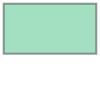

In [5]:
df.geometry[0]

In [6]:
df.geometry[0].bounds

(-77.11235046386719, 38.83649855755879, -76.96678161621094, 38.91507876347637)

In [7]:
from pyproj.crs import CRS

In [8]:
aea = CRS('+proj=aea +lat_1=29.5 +lat_2=42.5')

In [9]:
adf = df.to_crs(aea)

In [10]:
adf

,geometry
0,"POLYGON ((-5994436.812 6610974.907, -5985546.8..."


In [11]:
adf.bounds

,minx,miny,maxx,maxy
0,-5.994437e+06,6.602087e+06,-5.979351e+06,6.617172e+06


In [12]:
adf.bounds['maxx'][0]

-5979350.506710847

In [13]:
xdim = adf.bounds['maxx'][0] - adf.bounds['minx'][0]

In [14]:
xdim

15086.305151252076

In [15]:
ydim = adf.bounds['maxy'][0] - adf.bounds['miny'][0]

In [16]:
ydim

15085.83810407389

In [17]:
size = xdim * ydim

In [18]:
size

227589557.10044476

In [19]:
scientific_notation="{:e}".format(size)

In [20]:
scientific_notation

'2.275896e+08'

In [21]:
! free -h

              total        used        free      shared  buff/cache   available
Mem:            15G        4.0G         10G        692K        994M         11G
Swap:            0B          0B          0B


In [22]:
from shapely.geometry import mapping

In [23]:
geom = mapping(adf.to_dict()['geometry'][0])
geom

{'type': 'Polygon',
 'coordinates': (((-5994436.811862099, 6610974.906966197),
   (-5985546.883171438, 6602086.52564746),
   (-5979350.506710847, 6608293.18389055),
   (-5988231.232341879, 6617172.363751533),
   (-5994436.811862099, 6610974.906966197)),)}

In [25]:
tif_file = '/home/jovyan/bay/Baywide_13Class_20132014.tif'

In [26]:
import rioxarray
rds = rioxarray.open_rasterio(tif_file)

rds

<xarray.DataArray (band: 1, y: 878340, x: 499126)>
[438402330840 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 1.304e+06 1.304e+06 ... 1.803e+06 1.803e+06
  * y            (y) float64 2.535e+06 2.535e+06 ... 1.657e+06 1.657e+06
    spatial_ref  int64 0
Attributes:
    RepresentationType:      THEMATIC
    STATISTICS_COVARIANCES:  2.184897016039103
    STATISTICS_MAXIMUM:      12
    STATISTICS_MEAN:         3.587997581131
    STATISTICS_MINIMUM:      1
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       1.4781397146546
    _FillValue:              0.0
    scale_factor:            1.0
    add_offset:              0.0

# This blows up the jupyter kernel

In [ ]:
#my_ds = rds.rio.clip([geom])